# Laminar and turbulent flow over a flat plate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def parameters_Exp(u,dy,Uinf,islaminar,isTurbulent,x=650,nu= 1.48*pow(10,-5)):
    f =  1-(u/Uinf)
    g = (u/Uinf)*(f)
    deltaStar = np.trapz(f,dy)
    Theta = np.trapz(g,dy)
    ShapeFactor = deltaStar/Theta

    if islaminar:
        Cf = Theta/x
    if isTurbulent:
        xt = (dy)*Uinf/nu
        xt[0] = 1
        fxt = np.log(xt)
        fyt = u/Uinf
        C,b = np.polyfit(fxt,fyt,deg=1)
        fit_fn = C*fxt + b
        plt.plot(fxt,fyt,"-o")
        plt.plot(fxt,fit_fn,'--r');plt.legend(['experimental',f'C = {C}\nD = {b}'])
        plt.grid();plt.xlabel("ln( yUinf/mu )");plt.ylabel("u/Uinf");
        Cf = 2*(pow((C*0.41),2))
    
    return deltaStar, Theta, ShapeFactor,Cf
    
    

In [3]:
def parameters_Th(Uinf,islaminar,isTurbulent,x = 650,nu= 1.48*pow(10,-5)):
    Rex = (Uinf*x)/nu
    if islaminar:
        Blt = (5*x)/np.sqrt(Rex)
        Dt = (1.72*x)/np.sqrt(Rex)
        Theta = (0.664*x)/np.sqrt(Rex)
        Cf =  (0.664)/np.sqrt(Rex)
        H = Dt/Theta
    if isTurbulent:
        Blt = (0.16*x)/pow(Rex,(1/7))
        Dt = (0.02*x)/pow(Rex,(1/7))
        Theta = (0.016*x)/pow(Rex,(1/7))
        Cf =  (0.027*x)/pow(Rex,(1/7))
        H = Dt/Theta
    return Blt,Dt,Theta,H,Cf

# Pitote Tube data

## 1. Laminar Flow

In [4]:
pitoteDataLaminar = pd.read_csv("Aerodynamics-Experiment-I-Data/Pitot_tube_data/Laminar_flow/Laminar_pitot_tube_y_vs_u_at_x_650_mm.txt",delimiter='\t')

In [5]:
pitoteDataLaminar

,y (mm),u (m/s)
0,22.0,3.03836
1,20.0,3.03429
2,18.0,3.02762
3,16.0,3.06458
4,14.0,3.02987
5,12.0,3.06387
6,10.0,3.09410
7,9.0,3.08582
8,8.0,3.05797
9,7.0,2.97265


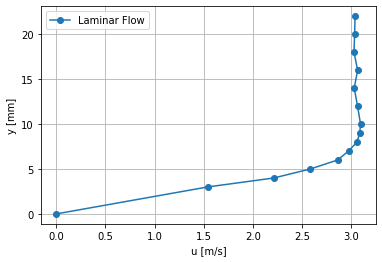

In [6]:
plt.plot(pitoteDataLaminar['u (m/s)'],pitoteDataLaminar['y (mm)'],'-o');
plt.grid();plt.xlabel('u [m/s]');plt.ylabel('y [mm]');plt.legend(["Laminar Flow"]);

In [7]:
Pitote_UinfLaminar = pitoteDataLaminar['u (m/s)'].mean()
dyL = pitoteDataLaminar['y (mm)']

In [8]:
Pitote_UinfLaminar

2.644443333333333

In [9]:
btL_Th,dtL_Th,tL_Th,hL_Th,CfL_Th = parameters_Th(Uinf=Pitote_UinfLaminar,islaminar=1,isTurbulent=0)
dtL_exp,tL_exp,hL_exp,CfL_exp = parameters_Exp(u=pitoteDataLaminar['u (m/s)'],Uinf=Pitote_UinfLaminar, dy= dyL*pow(10,-3),islaminar=1,isTurbulent=0)

> ## Boundary Layer Thickness (mm)

In [10]:
ubl = 0.99*Pitote_UinfLaminar

> ## Displacement Thickness (mm)

In [11]:
fy = 1-(pitoteDataLaminar['u (m/s)']/Pitote_UinfLaminar)
(dtL_Th,dtL_exp)

(0.10374062266443833, -7.721978034444131e-05)

> ## Momentum Thickness (mm)

In [12]:
ftheta = (1-fy)*(fy)
(tL_Th,tL_exp)

(0.04004870549371341, 0.0021677628504293534)

> ## Shape Factor

In [13]:
(hL_Th,hL_exp)

(2.5903614457831323, -0.03562187641011882)

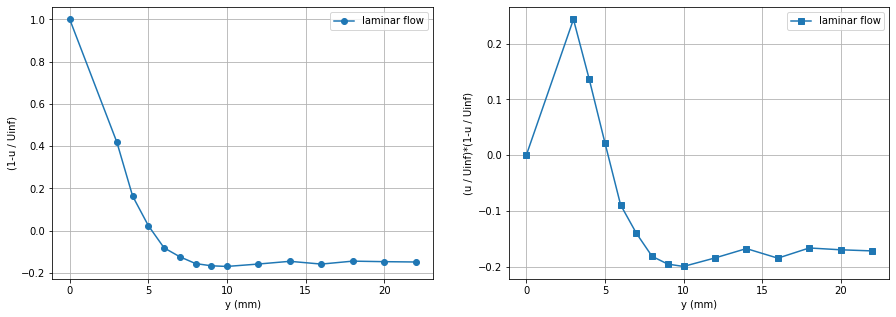

In [14]:
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
plt.plot(dyL,fy,'-o');plt.ylabel('(1-u / Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['laminar flow']);
plt.subplot(1,2,2);
plt.plot(dyL,ftheta,'-s');plt.ylabel('(u / Uinf)*(1-u / Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['laminar flow']);

## 2. Turbulent Flow

In [15]:
pitoteDataTurbulent = pd.read_csv("Aerodynamics-Experiment-I-Data/Pitot_tube_data/Turbulent_flow/Turbulent_pitot_tube_y_vs_u_at_x_650_mm.txt",delimiter='\t')

In [16]:
pitoteDataTurbulent

,y (mm),u (m/s)
0,1.0,1.20874
1,2.0,1.66123
2,3.0,1.91780
3,4.0,2.11534
4,5.0,2.26547
5,6.0,2.37887
6,7.0,2.54195
7,8.0,2.63796
8,9.0,2.70496
9,10.0,2.85831


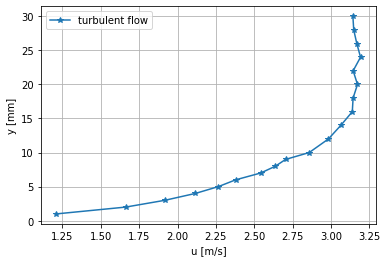

In [17]:
plt.plot(pitoteDataTurbulent['u (m/s)'],pitoteDataTurbulent['y (mm)'],'-*');plt.grid();plt.xlabel('u [m/s]');plt.ylabel('y [mm]');plt.legend(['turbulent flow']);

In [18]:
Pitote_Uinf_Turbulent = pitoteDataTurbulent['u (m/s)'].mean()
dyt = pitoteDataTurbulent['y (mm)']

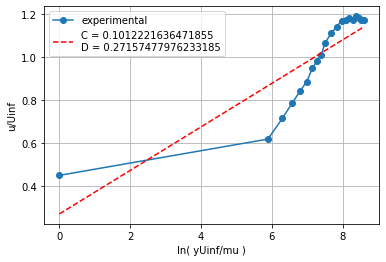

In [19]:
btT_Th, dtT_Th, tT_Th, hT_Th,CfT_Th =parameters_Th(Uinf=Pitote_Uinf_Turbulent,isTurbulent=1,islaminar=0)
dtT_exp,tT_exp,hT_exp,CfT_exp = parameters_Exp(u=pitoteDataTurbulent['u (m/s)'], Uinf= Pitote_Uinf_Turbulent, dy= dyt*pow(10,-3),isTurbulent=1,islaminar=0)

> ## Boundary Layer Thickness

In [20]:
btL_Th

0.30157157751290214

> ## Displacement tickness (mm)

In [21]:
fyt = 1-(pitoteDataTurbulent['u (m/s)']/Pitote_Uinf_Turbulent)
(dtT_Th,dtT_exp)

(0.9140691165929465, -0.0018167360225750163)

> ## Momentum Thickness (mm)

In [22]:
fThetat = (1-fyt)*fyt
(tT_Th,tT_exp)

(0.7312552932743572, -0.002828540881957349)

> ## Shape Factor

In [23]:
(hT_Th,hT_exp)

(1.25, 0.642287348280374)

> ## Skin friction

In [24]:
(CfT_Th,CfT_exp)

(1.2339933074004779, 0.003444680460190998)

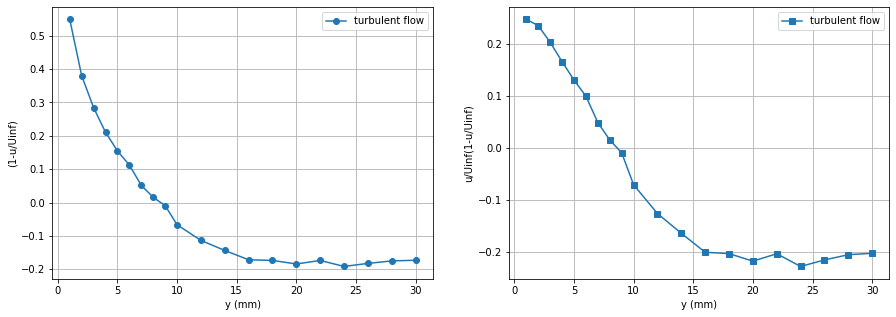

In [25]:
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
plt.plot(dyt,fyt,'-o');plt.ylabel('(1-u/Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['turbulent flow']);
plt.subplot(1,2,2);
plt.plot(dyt,fThetat,'-s');plt.ylabel('u/Uinf(1-u/Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['turbulent flow']);

# PIV data

## 1. Laminar flow

In [26]:
pivLaminar_data = pd.read_csv('Aerodynamics-Experiment-I-Data/PIV_data/Laminar_flow/laminar_PIV_y_vs_u_at_x_650_mm.dat',delimiter=' ')

In [27]:
pivLaminar_data.drop(['Unnamed: 2'],axis=1)

,y(mm),u(m/s)
0,0.000000,0.000000
1,1.143169,1.139810
2,1.536901,1.363569
3,1.891262,1.583965
4,2.284996,1.835112
...,...,...
89,34.019672,3.886498
90,34.413376,3.886417
91,34.767712,3.886255
92,35.161411,3.885363


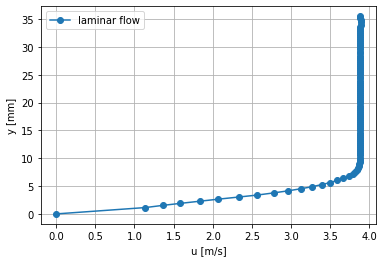

In [28]:
plt.plot(pivLaminar_data['u(m/s)'],pivLaminar_data['y(mm)'],'-o');plt.grid();plt.xlabel('u [m/s]');plt.ylabel('y [mm]');plt.legend(['laminar flow']);

In [29]:
piv_UinfL = pivLaminar_data['u(m/s)'].mean()
piv_dyL = pivLaminar_data['y(mm)']

In [30]:
piv_UinfL

3.6343092765957445

In [31]:
piv_btL_Th,piv_dtL_Th, piv_tL_Th, piv_hL_Th,piv_CfL_Th = parameters_Th(Uinf=piv_UinfL,islaminar=1,isTurbulent=0)
piv_dtL_exp, piv_tL_exp, piv_hL_exp,piv_CfL_exp = parameters_Exp(u= pivLaminar_data['u(m/s)'], Uinf=piv_UinfL, dy= piv_dyL,isTurbulent=0,islaminar=1)

> # Boundary Layer Thickness

In [32]:
0.99*piv_UinfL

3.597966183829787

In [33]:
piv_btL_Th

0.25724479670369527

> # Displacement Thickness

In [34]:
piv_fyL = 1-(pivLaminar_data['u(m/s)']/piv_UinfL)
(piv_dtL_Th,piv_dtL_exp)

(0.08849221006607118, 0.4844853016488985)

> # Momentum Thickness

In [35]:
piv_fThetaL = (1-piv_fyL)*piv_fyL
(piv_tL_Th,piv_tL_exp)

(0.03416210900225074, -1.1340198880338401)

> # Shape Factor

In [36]:
(piv_hL_Th,piv_hL_exp)

(2.5903614457831323, -0.42722822303310526)

> # Skin Friction

In [37]:
(piv_CfL_Th,piv_CfL_exp)

(5.255709077269344e-05, -0.0017446459815905232)

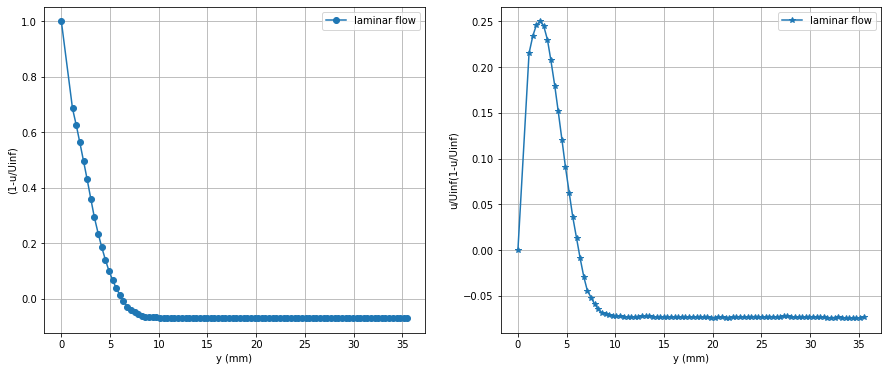

In [38]:
plt.figure(figsize=(15,6));
plt.subplot(1,2,1);
plt.plot(piv_dyL,piv_fyL,'-o');plt.ylabel('(1-u/Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['laminar flow']);
plt.subplot(1,2,2);
plt.plot(piv_dyL,piv_fThetaL,'-*');plt.ylabel('u/Uinf(1-u/Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['laminar flow']);

## 2. Turbulent Flow

In [39]:
pivTurbulent_data = pd.read_csv('Aerodynamics-Experiment-I-Data/PIV_data/Turbulent_flow/Turbulent_PIV_y_vs_u_at_x_650_mm.dat',delimiter=' ')

In [40]:
pivTurbulent_data.drop(['Unnamed: 2'],axis=1)

,y(mm),u(m/s)
0,0.000000,0.000000
1,1.143169,1.967103
2,1.536901,2.249032
3,1.891262,2.398744
4,2.284996,2.522491
...,...,...
89,34.019672,3.880981
90,34.413376,3.881855
91,34.767712,3.881455
92,35.161411,3.880423


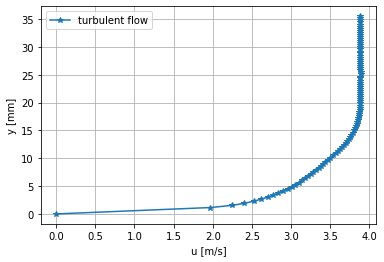

In [41]:
plt.plot(pivTurbulent_data['u(m/s)'],pivTurbulent_data['y(mm)'],'-*');plt.grid();plt.xlabel('u [m/s]');plt.ylabel('y [mm]');plt.legend(['turbulent flow']);

In [42]:
piv_UinfT = pivTurbulent_data['u(m/s)'].mean()
piv_dyT = pivTurbulent_data['y(mm)']
piv_UinfT

3.5749670638297877

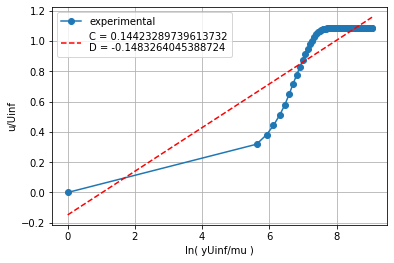

In [43]:
piv_btT_Th,piv_dtT_Th, piv_tT_Th, piv_hT_Th,piv_CfT_Th = parameters_Th(Uinf=piv_UinfT, isTurbulent=1, islaminar=0)
piv_dtT_exp, piv_tT_exp, piv_hT_exp,piv_CfT_exp = parameters_Exp(u= pivLaminar_data['u(m/s)'], Uinf=piv_UinfT, dy= piv_dyT*pow(10,-3),isTurbulent=1,islaminar=0)

> # Boundary Layer Thickness

In [44]:
piv_btT_Th

7.017575574811429

> # Displacement Thickness

In [45]:
piv_fyT = 1-(pivTurbulent_data['u(m/s)']/piv_UinfT)
(piv_dtT_Th,piv_dtT_exp)

(0.8771969468514286, -9.701162144935398e-05)

> # Momentum Thickness

In [46]:
piv_fThetaT = (1-piv_fyT)*piv_fyT
(piv_tT_Th,piv_tL_exp)

(0.7017575574811429, -1.1340198880338401)

> # Shape Factor

In [47]:
(piv_hT_Th,piv_hT_exp)

(1.25, 0.05502239334381089)

> # Skin Friciton

In [48]:
(piv_CfT_Th,piv_CfT_exp)

(1.1842158782494285, 0.006994011866009907)

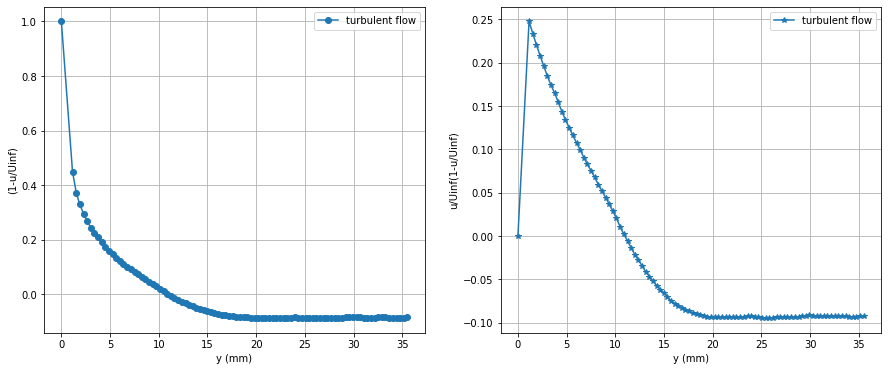

In [49]:
plt.figure(figsize=(15,6));
plt.subplot(1,2,1);
plt.plot(piv_dyT,piv_fyT,'-o');plt.ylabel('(1-u/Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['turbulent flow']);
plt.subplot(1,2,2);
plt.plot(piv_dyT,piv_fThetaT,'-*');plt.ylabel('u/Uinf(1-u/Uinf)');plt.xlabel('y (mm)');plt.grid();plt.legend(['turbulent flow']);

# Blasius Data

In [50]:
blasius_df = pd.read_csv('Aerodynamics-Experiment-I-Data/Blasius_data.dat',delim_whitespace=True)

In [51]:
blasius_df

,y(mm),u(m/s)
0,0.000000,0.000000
1,0.005811,0.003320
2,0.011623,0.006640
3,0.017434,0.009960
4,0.023245,0.013280
...,...,...
996,5.788006,0.999913
997,5.793817,0.999913
998,5.799628,0.999913
999,5.805439,0.999913


# Normalization

## 1. Pitote tube

In [52]:
pitote_deltaStar_lamianr = 1.44

In [53]:
pitote_lamianr_normalize_u = pitoteDataLaminar['u (m/s)']/Pitote_UinfLaminar
pitote_lamianr_normalize_y = pitoteDataLaminar['y (mm)']/pitote_deltaStar_lamianr

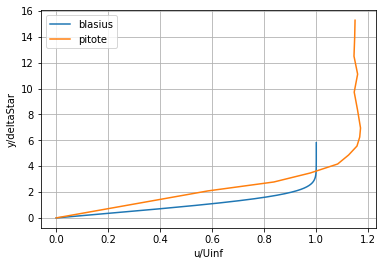

In [73]:
plt.plot(blasius_df['u(m/s)'],blasius_df['y(mm)'])
plt.plot(pitote_lamianr_normalize_u,pitote_lamianr_normalize_y);
plt.ylabel('y/deltaStar');plt.xlabel('u/Uinf');
plt.legend(['blasius','pitote']);plt.grid();

## 2. PIV data

### i. At 619mm

In [55]:
piv_619_df = pd.read_csv('Aerodynamics-Experiment-I-Data/PIV_data/Laminar_flow/laminar_PIV_y_vs_u_at_x_619_mm.dat',delimiter='\t')

In [56]:
piv_619_deltaStar = 2.152
Uinf_619 = 3.6324

In [57]:
piv_normalize_619_u = piv_619_df['u(m/s)']/Uinf_619
piv_normalize_619_y = piv_619_df['y(mm)']/piv_619_deltaStar

### i. At 650mm

In [58]:
piv_650_deltaStar = 2.112832
Uinf_650 = 3.63431

In [59]:
piv_normalize_650_u = pivLaminar_data['u(m/s)']/Uinf_650
piv_normalize_650_y = pivLaminar_data['y(mm)']/piv_650_deltaStar

### i. At 680mm

In [60]:
piv_680_df = pd.read_csv('Aerodynamics-Experiment-I-Data/PIV_data/Laminar_flow/laminar_PIV_y_vs_u_at_x_680_mm.dat',delimiter='\t')

In [61]:
piv_680_deltaStar = 2.1011
Uinf_680 = 3.62625

In [62]:
piv_normalize_680_u = piv_680_df['u(m/s)']/Uinf_680
piv_normalize_680_y = piv_680_df['y(mm)']/piv_680_deltaStar

### i. At 711mm

In [63]:
piv_711_df = pd.read_csv('Aerodynamics-Experiment-I-Data/PIV_data/Laminar_flow/laminar_PIV_y_vs_u_at_x_711_mm.dat',delimiter='\t')

In [64]:
piv_711_deltaStar = 2.094456
Uinf_711 = 3.619282

In [65]:
piv_normalize_711_u = piv_711_df['u(m/s)']/Uinf_711
piv_normalize_711_y = piv_711_df['y(mm)']/piv_711_deltaStar

### i. At 742mm

In [66]:
piv_742_df = pd.read_csv('Aerodynamics-Experiment-I-Data/PIV_data/Laminar_flow/laminar_PIV_y_vs_u_at_x_742_mm.dat',delimiter='\t')

In [67]:
piv_742_deltaStar = 2.1011
Uinf_742 = 3.62625

In [68]:
piv_normalize_742_u = piv_742_df['u(m/s)']/Uinf_742
piv_normalize_742_y = piv_742_df['y(mm)']/piv_742_deltaStar

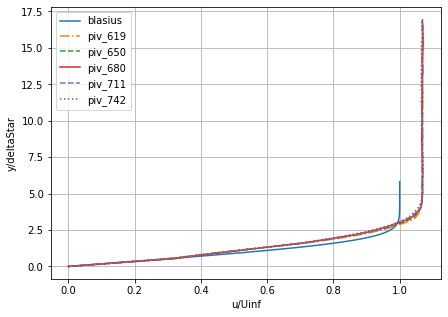

In [72]:
plt.figure(figsize=(7,5));
plt.plot(blasius_df['u(m/s)'],blasius_df['y(mm)'])
plt.plot(piv_normalize_619_u,piv_normalize_619_y,"-.")
plt.plot(piv_normalize_650_u,piv_normalize_650_y,"--")
plt.plot(piv_normalize_680_u,piv_normalize_680_y,"-")
plt.plot(piv_normalize_711_u,piv_normalize_711_y,"--")
plt.plot(piv_normalize_742_u,piv_normalize_742_y,':');
plt.ylabel('y/deltaStar');plt.xlabel('u/Uinf');plt.grid();
plt.legend(['blasius','piv_619','piv_650','piv_680','piv_711','piv_742']);